# 02 Detect Sales

Detect contiguous sale episodes and compute baseline metrics.

Excluded episodes (baseline < 7 days): 0


,sale_id,app_id,sale_start_date,sale_end_date,sale_duration_days,sale_depth_max,sale_depth_mode,baseline_players,days_since_last_sale,sales_count_last_90d,sale_days_last_90d,sale_share_last_90d
0,10_2019-06-25,10,2019-06-25,2019-07-08,14,90.0,90.0,8949.460747,<NA>,0,0,0.000000
1,10_2019-11-26,10,2019-11-26,2019-12-02,7,90.0,90.0,8384.760291,141,0,0,0.000000
2,10_2019-12-19,10,2019-12-19,2020-01-01,14,90.0,90.0,8837.703028,17,1,7,0.077778
3,10_2020-06-25,10,2020-06-25,2020-07-08,14,80.0,80.0,11646.232639,176,0,0,0.000000
4,20_2019-06-25,20,2019-06-25,2019-07-08,14,90.0,90.0,63.250000,<NA>,0,0,0.000000


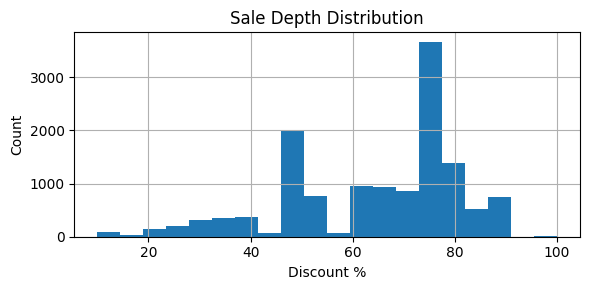

In [1]:
from pathlib import Path
import sys

def find_repo_root():
    cwd = Path().resolve()
    for candidate in (cwd,) + tuple(cwd.parents):
        if (candidate / 'src').is_dir() and (candidate / 'config.yaml').exists():
            return candidate
    return cwd

ROOT = find_repo_root()
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

import pandas as pd
import matplotlib.pyplot as plt

from src.config import load_config
from src.sales import detect_sales

config = load_config()
panel_path = ROOT / 'data/processed/panel_daily.parquet'
panel = pd.read_parquet(panel_path)
sales, info = detect_sales(panel, config=config)
sales_path = ROOT / 'data/processed/sales.parquet'
sales_path.parent.mkdir(parents=True, exist_ok=True)
sales.to_parquet(sales_path, index=False)
print('Excluded episodes (baseline < 7 days):', info['excluded'])
display(sales.head())

plt.figure(figsize=(6, 3))
sales['sale_depth_max'].hist(bins=20)
plt.title('Sale Depth Distribution')
plt.xlabel('Discount %')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
sales = pd.read_parquet(ROOT/"data/processed/sales.parquet")
print("Sale episodes:", len(sales))
display(sales[["app_id","sale_start_date","sale_end_date","sale_depth_max","sale_duration_days"]].head())


Sale episodes: 13498


,app_id,sale_start_date,sale_end_date,sale_depth_max,sale_duration_days
0,10,2019-06-25,2019-07-08,90.0,14
1,10,2019-11-26,2019-12-02,90.0,7
2,10,2019-12-19,2020-01-01,90.0,14
3,10,2020-06-25,2020-07-08,80.0,14
4,20,2019-06-25,2019-07-08,90.0,14
